## Step1: Imort Data

In [1]:
# Data Preparation
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import glob
import os 
os.chdir('/media/kuo-jui/data/ISM_finalproject/')
fitls = glob.glob('*.fits')
data_dict = {}
for i in fitls:
    name = i.split('-')[0]
    suffix = i.split('.')[0][-3:]
    #print(name+'.'+suffix)
    source = name + '.' +suffix
    hdul = fits.open(i)
    data = hdul[1].data
    err = hdul[2].data
    header = hdul[1].header
    data_dict['%s' %source] = {'header': header, 'data': data, 'error': err}
# 'TMC1A_g235h.x1d', 'TMC1A_g140h.x1d', 'TMC1A_g140h.s3d', 'TMC1A_g395h.x1d', 'TMC1A_g235h.s3d', 'TMC1A_g395h.s3d'

#print(data_dict.keys())
print(repr(data_dict['TMC1A_g140h.s3d']['header']))

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   53                                                  
NAXIS2  =                   55                                                  
NAXIS3  =                 3915                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'SCI     '           / extension name                                 
SRCTYPE = 'EXTENDED'           / Source type used for calibration               
MJD-BEG =    59824.70809917824 / [d] exposure start time in MJD                 
MJD-AVG =    59824.75615017361 / [d] exposure mid-point in MJD                  
MJD-END =   59824.8041590740

## Step2: Overview the image and spectrum

Text(0.5, 1.0, '$I_\\nu$ [MJy/Sr]')

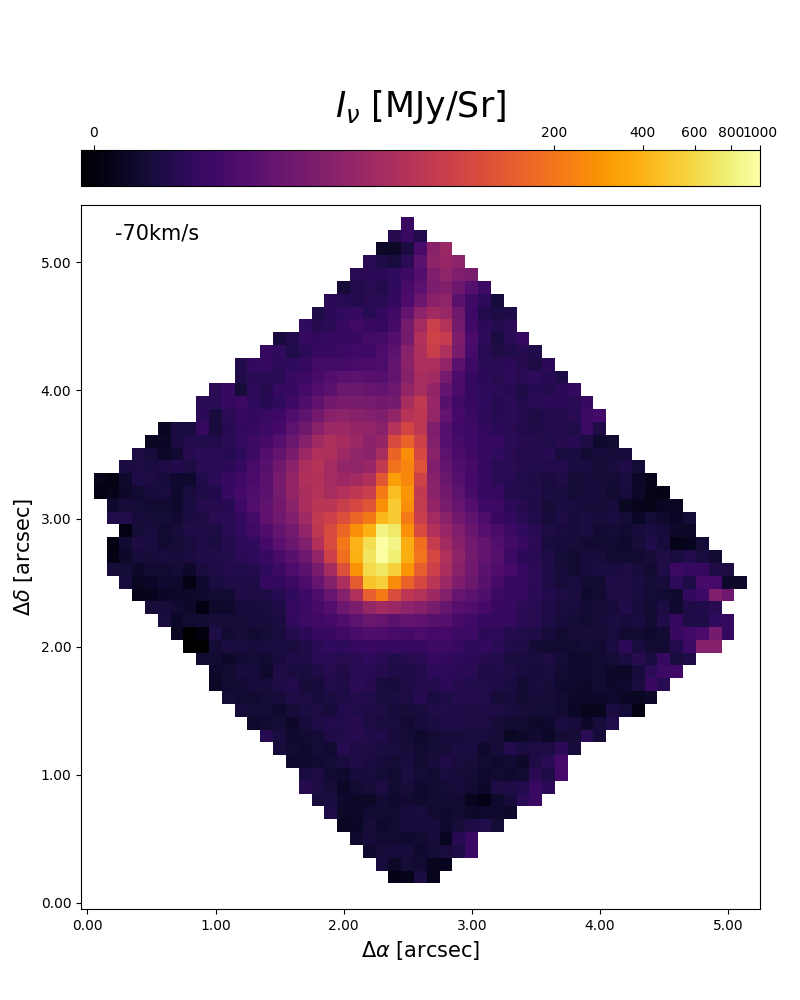

In [2]:
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
from matplotlib.ticker import FuncFormatter
from astropy.visualization import LogStretch, AsinhStretch, ImageNormalize, ManualInterval, make_lupton_rgb
import matplotlib
%matplotlib widget



# Plot the raw image, g140 
g140_s3d = data_dict['TMC1A_g140h.s3d']['data']
pixel = data_dict['TMC1A_g140h.s3d']['header']['CDELT1']*3600 # change the pixel unit  qfrom deg to arcsec

def axis_transfer(pos,val):
    return f'{pos*pixel:.2f}'

fig = plt.figure(figsize = (8,10))

widths = [0.05,1]
heights = [0.05,1]
gs = fig.add_gridspec(2, 2, width_ratios=widths,height_ratios=heights)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.85, wspace=0.02, hspace=0.02)

ax1 = fig.add_subplot(gs[1,1])
cbar1 = fig.add_subplot(gs[0,1])
norm1 = ImageNormalize(g140_s3d[3910], vmin= -1, vmax = 1e3, stretch=AsinhStretch(a=1e-2))
plt1 = ax1.imshow(g140_s3d[2865],norm = norm1, cmap= 'inferno', origin = 'lower')
cb1 = Colorbar(ax = cbar1, mappable = plt1, orientation = 'horizontal', ticklocation = 'top') #, ticks = [0, 2e2, 1e3, 3e3, 5.5e3])

ax1.xaxis.set_major_formatter(FuncFormatter(axis_transfer))
ax1.yaxis.set_major_formatter(FuncFormatter(axis_transfer))
ax1.set_xlabel(r'$\Delta \alpha$' +' [arcsec]', fontsize = 15)
ax1.set_ylabel(r'$\Delta \delta$'+' [arcsec]',fontsize = 15)
ax1.text(0.05,0.95, '-70km/s',transform=ax1.transAxes,fontsize = 15)
cbar1.set_title(r'$I_\nu$'+' [MJy/Sr]',fontsize = 25)



In [50]:
# Plot the spectrum without conntinuum subtraction, g140
print(g140_s3d.shape)
omega = (pixel/3600*np.pi/180)**2# Set the solid angle to pixel
print(omega)
flux = []
wave = []
wave0 = data_dict['TMC1A_g140h.s3d']['header']['CRVAL3']
delta_wave = data_dict['TMC1A_g140h.s3d']['header']['CDELT3']
for i in range(len(g140_s3d)):
    mask_valid = ~np.isnan(g140_s3d)
    masked_slice = np.where(mask_valid[i], g140_s3d[i], 0.0)
    f_w = np.sum(masked_slice) * 1e6 * omega
    flux.append(f_w)
    w = wave0 + i*delta_wave
    wave.append(w)
print(wave)
print(flux)


(3915, 55, 53)
2.3504431239584476e-13
[0.9701175286099897, 0.97035252860951, 0.9705875286090304, 0.9708225286085508, 0.9710575286080712, 0.9712925286075915, 0.9715275286071119, 0.9717625286066323, 0.9719975286061526, 0.972232528605673, 0.9724675286051934, 0.9727025286047137, 0.9729375286042341, 0.9731725286037545, 0.9734075286032748, 0.9736425286027952, 0.9738775286023156, 0.974112528601836, 0.9743475286013563, 0.9745825286008767, 0.974817528600397, 0.9750525285999174, 0.9752875285994378, 0.9755225285989582, 0.9757575285984785, 0.9759925285979989, 0.9762275285975193, 0.9764625285970396, 0.97669752859656, 0.9769325285960804, 0.9771675285956007, 0.9774025285951211, 0.9776375285946415, 0.9778725285941618, 0.9781075285936822, 0.9783425285932026, 0.978577528592723, 0.9788125285922433, 0.9790475285917637, 0.9792825285912841, 0.9795175285908044, 0.9797525285903248, 0.9799875285898452, 0.9802225285893655, 0.9804575285888859, 0.9806925285884063, 0.9809275285879266, 0.981162528587447, 0.98139752

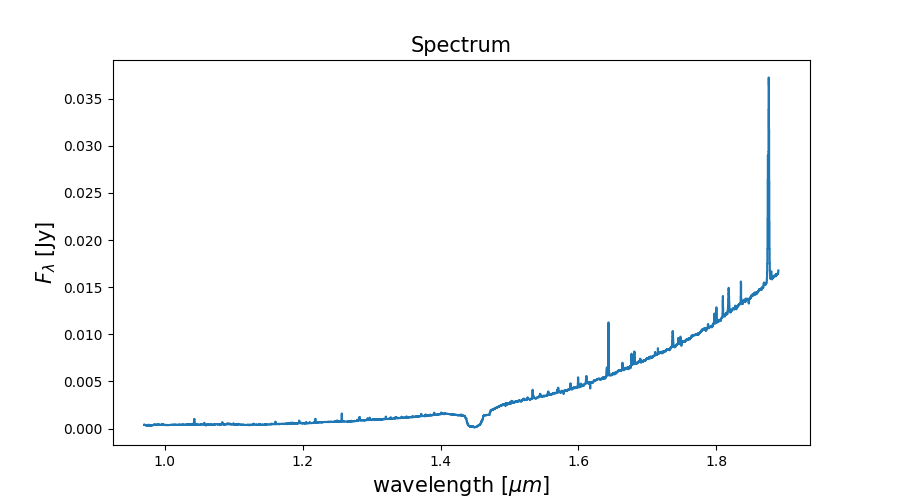

In [51]:
fig = plt.figure(figsize = (9,5))
plt.step(wave, np.array(flux), where = 'mid')
#plt.xlim(1.64,1.65)
#plt.ylim(0,50)
plt.xlabel('wavelength ' + r'$[\mu m]$', fontsize = 15)
plt.ylabel(r'$F_\lambda$'+' [Jy]', fontsize = 15)
plt.title('Spectrum', fontsize = 15)
plt.show()
#plt.close()


## Step3: Continuum subtraction using Sagov-filter
The method is based on JDISC program and ctool (https://github.com/pontoppi/ctool). After that we will correct the radial velocity.

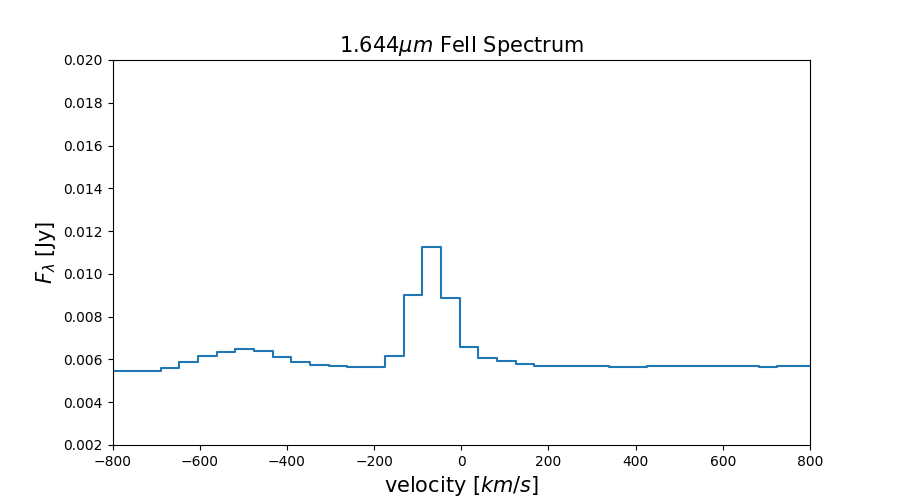

In [52]:
# From previous result we can see that there are lots of bad pixel, so we first need to use shift coordinat and continuum subtraction
# Reminder: g140_s3d is the original data cube
import bettermoments as bm
from scipy.signal import medfilt,savgol_filter
import copy

def optical_veocity(wave, restwave, c = 3e5):
    # wave is a wavelength array
    # c is speed of light in km/s
    vopt = (wave -restwave)/restwave*c
    return vopt

w1644_rest = 1.644 # unit is micron meter
data = g140_s3d
wave = np.array(wave)

v_barycorr = data_dict['TMC1A_g140h.s3d']['header']['VELOSYS']
v_1644 = optical_veocity(wave, w1644_rest) #+ v_barycorr/1000 # change the x axis into velocity channel 
#print(v_1644)
fig = plt.figure(figsize = (9,5))
plt.step(v_1644, flux, where='mid')
plt.xlim(-800,800)
plt.ylim(2e-3,2e-2)
plt.xlabel('velocity ' + r'$[km/s]$', fontsize = 15)
plt.ylabel(r'$F_\lambda$'+' [Jy]', fontsize = 15)
plt.title(r'$1.644\mu m$'+' FeII Spectrum', fontsize = 15)
plt.show()


def calc_cont(wave,flux, niter=1, boxsize = 9, exclude=None, threshold=0.998, offset=0, spike_threshold=None):

    flux_tmp= copy.deepcopy(flux)

    #Remove negative spikes from consideration
    if(spike_threshold is not None):
        bad_pix, _ = find_peaks(-1*flux_tmp, prominence=spike_threshold)
        flux_tmp[bad_pix] = np.nan

    #Exclude regions    
    if(exclude is not None):
        for myexclude in exclude:  #Exclude regions from fitting
            localbool=((wave>myexclude[0]) & (wave<myexclude[1]))
            flux_tmp[localbool]=np.nan   
            
    #Perform continuum determination        
    cont = copy.deepcopy(flux_tmp)  

    # Fill NaNs by linear interp (only if we have anchors)
    good = np.isfinite(cont)
    if good.sum() >= 2:
        cont[~good] = np.interp(wave[~good], wave[good], cont[good])
    else:
        return np.full_like(cont, np.nan)  
    
    for _ in range(max(1, int(niter))):
        smooth = medfilt(cont.astype(np.float64), boxsize)
        valid  = np.isfinite(smooth) & np.isfinite(cont)
        anchor = valid & (smooth > cont * float(threshold))

        # If too few anchors, relax once; if still too few, fall back to smooth
        if anchor.sum() < 2:
            anchor = valid & (smooth > cont * 0.99)
        if anchor.sum() < 2:
            cont = smooth
            break
        #print('smooth:', smooth)
        cont = np.interp(wave, wave[anchor], cont[anchor])
    
    #for ii in np.arange(niter):
        #print('##################################################')
        #print('niter', ii)
    #    smooth = medfilt(cont.astype(np.float64),boxsize)
    #    print('smooth: ',smooth)
    #    if np.all(smooth == 0):
    #        continue
    #    csubs = np.where(smooth>cont*threshold)
    #    print('csubs', csubs)
    #    cont = np.interp(wave,wave[csubs],cont[csubs])

    # The following makes sure that the window is large enough but not larger than the total length
    sg_window = min(boxsize*3 if  boxsize% 2 else (boxsize+1)*3, max(boxsize*3, len(flux_tmp) - (1 - len(flux_tmp) % 2)))
    if sg_window >= 10 and sg_window <= len(flux_tmp):
        # 10 is just a number to limit the lower bound
        cont = savgol_filter(cont, sg_window, polyorder=1,mode='interp')
    
    #Apply offset
    cont+=offset
    
    return cont

# When we calculate the continuum emission (the y axis), it doesn't relate to the value of the wavelength. 
# Hence, we can first ignore the barycentric correction
# Here, we want to calculate the continuum emission of each spaxel. Thus, we need to first read each spaxel

cont_spaxel = np.zeros_like(data)
line_spaxel = np.zeros_like(data)

for j in range(data.shape[1]):
    for i in range(data.shape[2]):
        check = data[:,j,i]
        #print('pre: ',check)
        if np.all(check == 0):
            continue
        #print('post: ',check)
        cont_spaxel[:,j,i] = calc_cont(wave, data[:,j,i], boxsize =11)
        line_spaxel[:,j,i] = data[:,j,i] - cont_spaxel[:,j,i]





Text(0.5, 1.0, '$I_\\nu$ [MJy/Sr]')

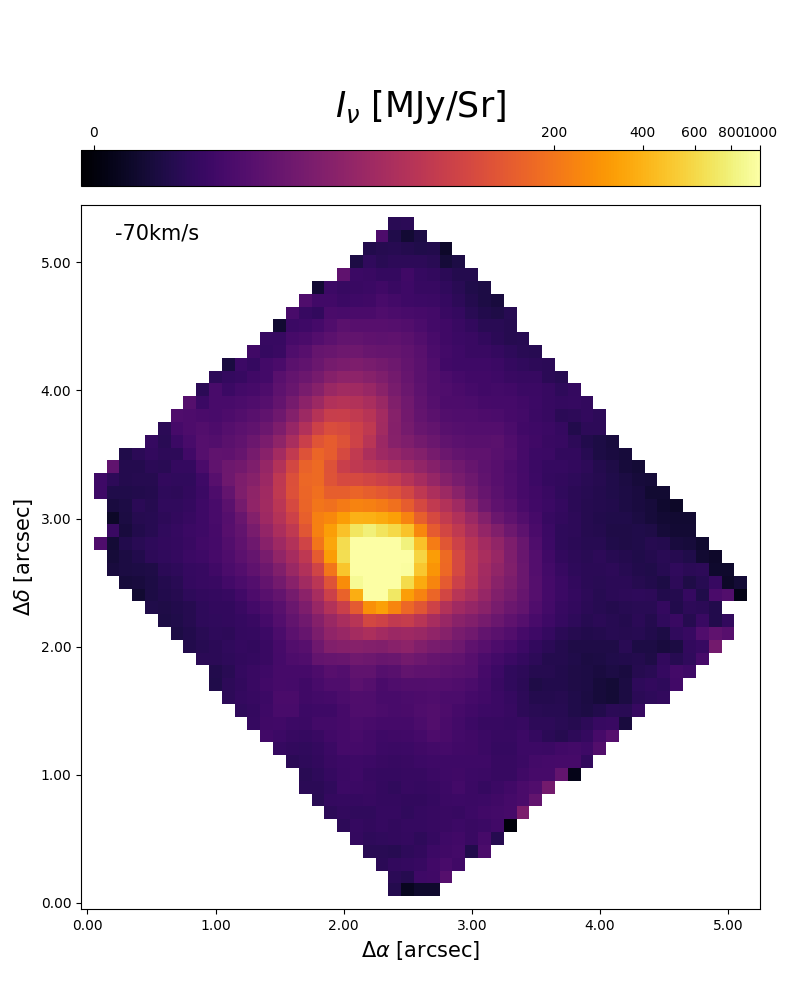

In [53]:
# Plot the continuum emission

fig = plt.figure(figsize = (8,10))
widths = [0.05,1]
heights = [0.05,1]
gs = fig.add_gridspec(2, 2, width_ratios=widths,height_ratios=heights)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.85, wspace=0.02, hspace=0.02)

ax1 = fig.add_subplot(gs[1,1])
cbar1 = fig.add_subplot(gs[0,1])
#norm1 = ImageNormalize(line_spaxel[3855],vmin= -1, vmax = 1e3, stretch=AsinhStretch(a=1e-2))
#plt1 = ax1.imshow(line_spaxel[3855],norm = norm1, cmap= 'viridis', origin = 'lower')#, levels = [0.5e2, 1e2, 2e2,4e2,8e2,10e2])
norm2 = ImageNormalize(cont_spaxel[3855], vmin= -1, vmax = 1e3, stretch=AsinhStretch(a=1e-2))
plt2 = ax1.imshow(cont_spaxel[3855], norm = norm2, cmap= 'inferno', origin = 'lower')
cb1 = Colorbar(ax = cbar1, mappable = plt2, orientation = 'horizontal', ticklocation = 'top') #, ticks = [0, 2e2, 1e3, 3e3, 5.5e3])

ax1.xaxis.set_major_formatter(FuncFormatter(axis_transfer))
ax1.yaxis.set_major_formatter(FuncFormatter(axis_transfer))
ax1.set_xlabel(r'$\Delta \alpha$' +' [arcsec]', fontsize = 15)
ax1.set_ylabel(r'$\Delta \delta$'+' [arcsec]',fontsize = 15)
ax1.text(0.05,0.95, '-70km/s',transform=ax1.transAxes,fontsize = 15)
cbar1.set_title(r'$I_\nu$'+' [MJy/Sr]',fontsize = 25)

In [54]:
# Calculate the spectrum after subtract the continuum emission
omega = (pixel/3600*np.pi/180)**2# Set the solid angle to pixel
print(omega)
flux_line = []
noise = []
cont = []
for i in range(len(line_spaxel)):
    mask_valid = ~np.isnan(line_spaxel)
    cont_mask_valid = ~np.isnan(cont_spaxel)
    masked_slice = np.where(mask_valid[i], line_spaxel[i], 0.0)
    cont_masked_slice = np.where(cont_mask_valid[i],cont_spaxel[i], 0.0)
    f_w = np.sum(masked_slice) * 1e6 * omega # flux at each wave
    cont_w = np.sum(cont_masked_slice) * 1e6 * omega
    flux_line.append(f_w)
    cont.append(cont_w)
print(flux_line)

2.3504431239584476e-13
[0.0001680761795312752, 0.00014784103621329575, 0.00015939166231418014, 0.00015306048610624272, 0.00014123629677335905, 0.00016549648786531935, 0.00013282967527009575, 0.0001495065455206632, 0.00011837772093807517, 0.00013606116157041396, 0.00011706779075223139, 9.86159514711776e-05, 0.00011334882851592618, 9.99661794764501e-05, 0.0001082248295099742, 9.233824267976236e-05, 9.161121779795105e-05, 0.00010554327431007262, 0.00012421338746887925, 0.00012067116753779359, 9.787297387480427e-05, 7.405955921234493e-05, 8.936112470849023e-05, 0.00010595105840308116, 9.513884788127631e-05, 0.00015174595086520613, 0.00018364945762976286, 0.0001155918849089008, 6.983136538210912e-05, 9.752506984526865e-05, 0.00012422023049481998, 0.0001265020712077752, 0.0001184883713763997, 0.00011016204424670083, 0.00013574966760343087, 0.0001519290627794774, 0.00013882640396491768, 0.0001083637128100416, 0.00010141002925801015, 8.384325719687247e-05, 8.82121634378831e-05, 4.3683524867101

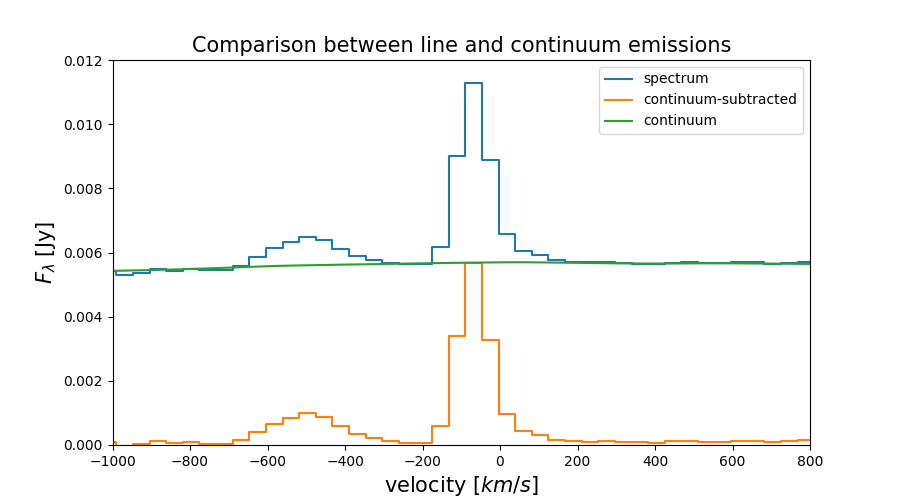

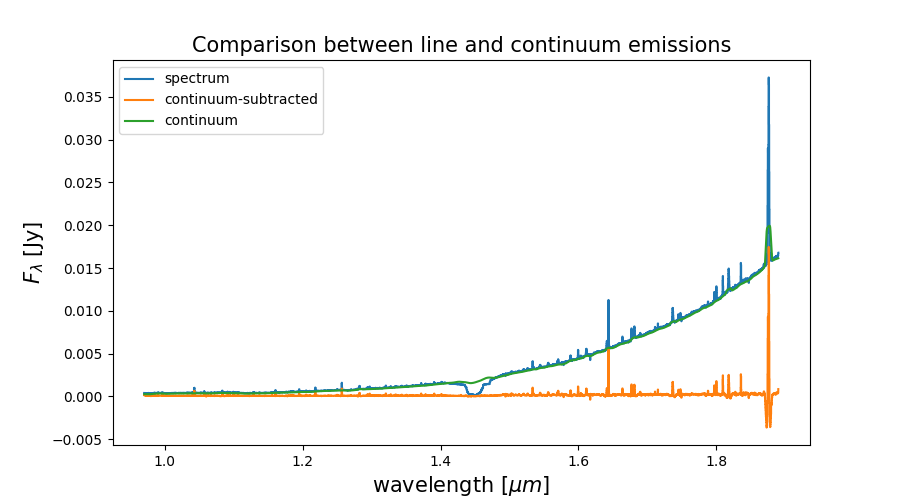

In [55]:
fig = plt.figure(figsize = (9,5))
plt.step(v_1644, np.array(flux), where = 'mid', label = 'spectrum')
plt.step(v_1644, np.array(flux_line), where = 'mid', label = 'continuum-subtracted')
plt.plot(v_1644, np.array(cont), label = 'continuum')
plt.xlim(-1000,800)
plt.ylim(0,1.2e-2)
plt.xlabel('velocity ' + r'$[km/s]$', fontsize = 15)
plt.ylabel(r'$F_\lambda$'+' [Jy]', fontsize = 15)
plt.title('Comparison between line and continuum emissions', fontsize = 15)
plt.legend()
plt.show()

fig = plt.figure(figsize = (9,5))
plt.step(wave, np.array(flux), where = 'mid', label = 'spectrum')
plt.step(wave, np.array(flux_line), where = 'mid', label = 'continuum-subtracted')
plt.plot(wave, np.array(cont), label = 'continuum')
#plt.xlim(-800,800)
#plt.ylim(0,1.2e-2)
plt.xlabel('wavelength ' + r'$[\mu m]$', fontsize = 15)
plt.ylabel(r'$F_\lambda$'+' [Jy]', fontsize = 15)
plt.title('Comparison between line and continuum emissions', fontsize = 15)
plt.legend()

In [56]:
# Save the line data and continuum data in new fits file
import os
os.chdir('subtract_continuum')
# export continuum as *_cont.fits
header = data_dict['TMC1A_g140h.s3d']['header']
hdu_new = fits.PrimaryHDU(data = cont_spaxel, header = header)
hdu_new.writeto('TMC1A_g140h.s3d'+'_cont.fits', overwrite=True)
# export continuum as *_line.fits
hdu_new = fits.PrimaryHDU(data = line_spaxel, header = header)
hdu_new.writeto('TMC1A_g140h.s3d'+'_line.fits', overwrite=True)

## Step 4: Create Moment zero and one map by using bettermoments

In [ ]:

# Generate Moment zero and one map of FeII 1.644 the line emission
filepath = '/media/kuo-jui/data/ISM_finalproject/subtract_continuum/'
os.chdir(filepath)


cont_data, cont_wave = bm.load_cube('TMC1A_g140h.s3d_line.fits')

# Decide the moment map region [w1:w2]

rms = bm.estimate_RMS(data=cont_data[2840:2885, 10:15, 24:34 ], N=10) # set it in a line free region
print('RMS = {:.1f} mJy/beam (original)'.format(rms ))

w1, w2 = 2860, 2870
cont_data = cont_data[w1:w2]
cont_wave = cont_wave[w1:w2]
cont_vel = optical_veocity(cont_wave, w1644_rest)

user_mask = bm.get_user_mask(data= cont_data, user_mask_path=None)

threshold_mask = bm.get_threshold_mask(data= cont_data,
                                       clip= 1,
                                       smooth_threshold_mask=0.0)

channel_mask = bm.get_channel_mask(data = cont_data,
                                   firstchannel = 0,
                                   lastchannel = -1)

mask = bm.get_combined_mask(user_mask = user_mask, threshold_mask = threshold_mask, channel_mask = channel_mask, combine = 'and')
masked_data = cont_data *mask

moments = bm.collapse_zeroth(velax= cont_vel, data= masked_data, rms= rms)
bm.save_to_FITS(moments = moments, method= 'zeroth', path= filepath+"TMC1A_g140h.s3d_line.fits")

moments = bm.collapse_first(velax= cont_vel, data= masked_data, rms= rms)
bm.save_to_FITS(moments = moments, method= 'first', path= filepath+"TMC1A_g140h.s3d_line.fits")

RMS = 0.5 mJy/beam (original)


In [143]:
# Read the continuum moment 0 map
filepath = '/media/kuo-jui/data/ISM_finalproject/subtract_continuum/'
os.chdir(filepath)

fitls = glob.glob('*.fits')
subcont_dict = {}
for i in fitls:
    hdul = fits.open(i)
    header = hdul[0].header
    data = hdul[0].data
    name = i.split('.')[0] +'.' + i.split('.')[1]
    subcont_dict['%s' %(name)] = {'header': header, 'data': data}
print(subcont_dict.keys())
# dict_keys(['TMC1A_g140h.s3d_line', 'TMC1A_g140h.s3d_cont_dM0', 'TMC1A_g140h.s3d_cont_M0', 'TMC1A_g140h.s3d_cont'])

dict_keys(['TMC1A_g140h.s3d_line_M0', 'TMC1A_g140h.s3d_line', 'TMC1A_g140h.s3d_line_dM0', 'TMC1A_g140h.s3d_line_M1', 'TMC1A_g140h.s3d_cont_dM0', 'TMC1A_g140h.s3d_cont_M0', 'TMC1A_g140h.s3d_cont', 'TMC1A_g140h.s3d_line_dM1'])


Text(0.5, 1.0, 'MJy/Sr km/s')

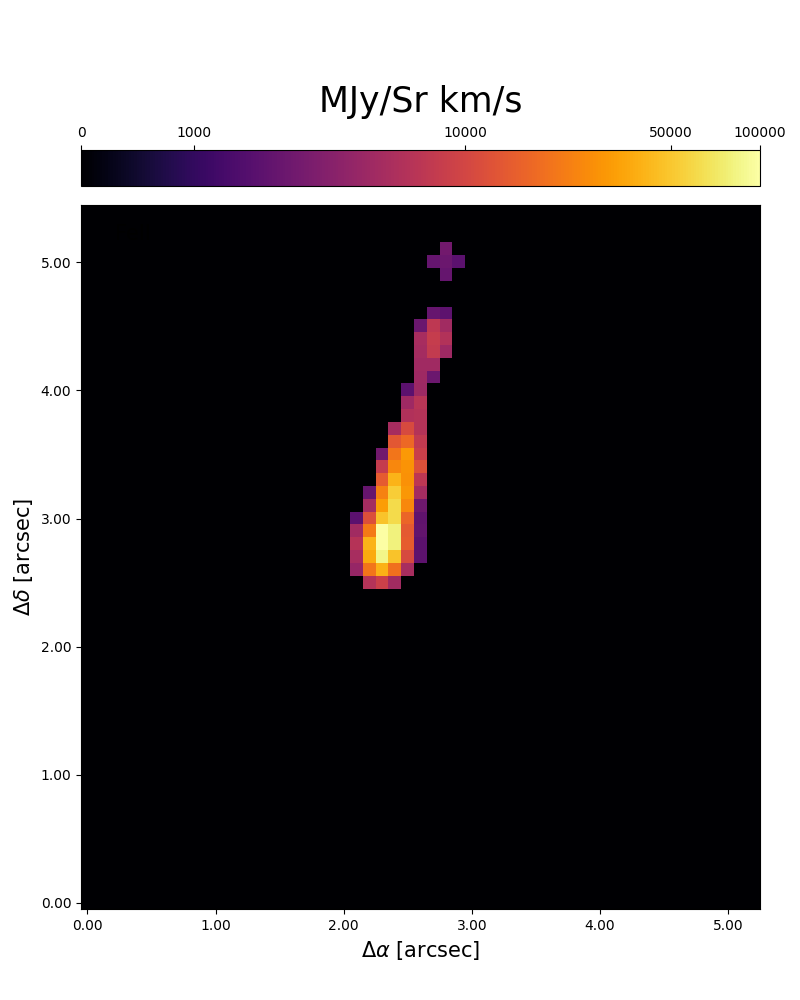

In [ ]:
# Plot the Moment zero map of 1.644 line
g140_s3d_lint_M0 = subcont_dict['TMC1A_g140h.s3d_line_M0']['data']
pixel = subcont_dict['TMC1A_g140h.s3d_line_M0']['header']['CDELT1']*3600 # change the pixel unit  qfrom deg to arcsec

def axis_transfer(pos,val):
    return f'{pos*pixel:.2f}'

fig = plt.figure(figsize = (8,10))

widths = [0.05,1]
heights = [0.05,1]
gs = fig.add_gridspec(2, 2, width_ratios=widths,height_ratios=heights)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.85, wspace=0.02, hspace=0.02)

ax1 = fig.add_subplot(gs[1,1])
cbar1 = fig.add_subplot(gs[0,1])
norm1 = ImageNormalize(g140_s3d_lint_M0, vmin= -1, vmax = 1e5, stretch=AsinhStretch(a=1e-2))
plt1 = ax1.imshow(g140_s3d_lint_M0, norm = norm1, cmap= 'inferno', origin = 'lower')
cb1 = Colorbar(ax = cbar1, mappable = plt1, orientation = 'horizontal', ticklocation = 'top', ticks = [0, 1e3, 1e4, 5e4, 1e5])

ax1.xaxis.set_major_formatter(FuncFormatter(axis_transfer))
ax1.yaxis.set_major_formatter(FuncFormatter(axis_transfer))
ax1.set_xlabel(r'$\Delta \alpha$' +' [arcsec]', fontsize = 15)
ax1.set_ylabel(r'$\Delta \delta$'+' [arcsec]',fontsize = 15)
ax1.text(0.05,0.95, 'FeII',transform=ax1.transAxes,fontsize = 15)
cbar1.set_title('MJy/Sr km/s',fontsize = 25, pad= 10)

Text(0.5, 1.0, 'km/s')

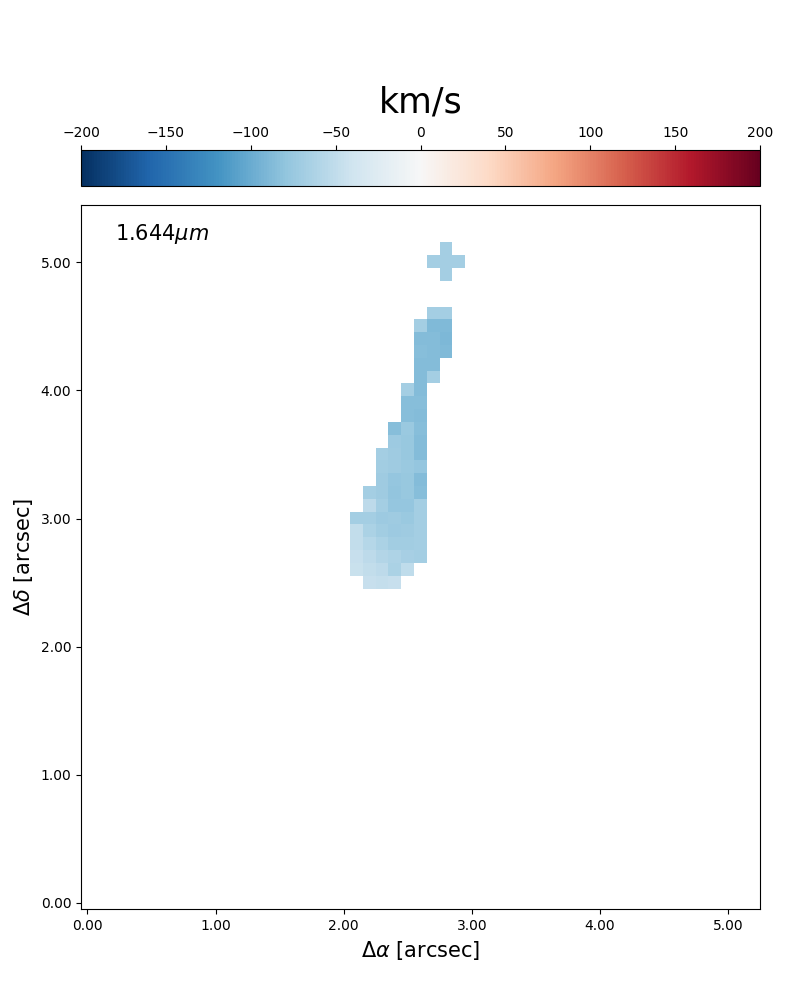

In [ ]:
# Plot the Moment one map of 1.644 line
g140_s3d_line_M1 = subcont_dict['TMC1A_g140h.s3d_line_M1']['data']
pixel = subcont_dict['TMC1A_g140h.s3d_line_M1']['header']['CDELT1']*3600 # change the pixel unit  qfrom deg to arcsec

def axis_transfer(pos,val):
    return f'{pos*pixel:.2f}'

fig = plt.figure(figsize = (8,10))

widths = [0.05,1]
heights = [0.05,1]
gs = fig.add_gridspec(2, 2, width_ratios=widths,height_ratios=heights)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.85, wspace=0.02, hspace=0.02)

ax1 = fig.add_subplot(gs[1,1])
cbar1 = fig.add_subplot(gs[0,1])
norm1 = ImageNormalize(g140_s3d_line_M1, vmin= -200, vmax = 200)
plt1 = ax1.imshow(g140_s3d_line_M1, norm = norm1, cmap= 'RdBu_r', origin = 'lower')
cb1 = Colorbar(ax = cbar1, mappable = plt1, orientation = 'horizontal', ticklocation = 'top')

ax1.xaxis.set_major_formatter(FuncFormatter(axis_transfer))
ax1.yaxis.set_major_formatter(FuncFormatter(axis_transfer))
ax1.set_xlabel(r'$\Delta \alpha$' +' [arcsec]', fontsize = 15)
ax1.set_ylabel(r'$\Delta \delta$'+' [arcsec]',fontsize = 15)
ax1.text(0.05,0.95, r'$1.644\mu m$',transform=ax1.transAxes,fontsize = 15)
cbar1.set_title('km/s',fontsize = 25, pad= 10)

In [147]:
# Generate Moment zero map of FeII 1.644 the continuum emission
filepath = '/media/kuo-jui/data/ISM_finalproject/subtract_continuum/'
os.chdir(filepath)


cont_data, cont_wave = bm.load_cube('TMC1A_g140h.s3d_cont.fits')

# Decide the moment map region [w1:w2]

rms = bm.estimate_RMS(data=cont_data[2840:2885, 10:15, 24:34 ], N=10) # set it in a line free region
print('RMS = {:.1f} mJy/beam (original)'.format(rms ))

w1, w2 = 2860, 2870
cont_data = cont_data[w1:w2]
cont_wave = cont_wave[w1:w2]
cont_vel = optical_veocity(cont_wave, w1644_rest)

user_mask = bm.get_user_mask(data= cont_data, user_mask_path=None)

threshold_mask = bm.get_threshold_mask(data= cont_data,
                                       clip= None,
                                       smooth_threshold_mask=0.0)

channel_mask = bm.get_channel_mask(data = cont_data,
                                   firstchannel = 0,
                                   lastchannel = -1)

mask = bm.get_combined_mask(user_mask = user_mask, threshold_mask = threshold_mask, channel_mask = channel_mask, combine = 'and')
masked_data = cont_data *mask

moments = bm.collapse_zeroth(velax= cont_vel, data= masked_data, rms= rms)
bm.save_to_FITS(moments = moments, method= 'zeroth', path= filepath+"TMC1A_g140h.s3d_line.fits")

#moments = bm.collapse_first(velax= cont_vel, data= masked_data, rms= rms)
#bm.save_to_FITS(moments = moments, method= 'first', path= filepath+"TMC1A_g140h.s3d_line.fits")

# Read the continuum moment 0 map
filepath = '/media/kuo-jui/data/ISM_finalproject/subtract_continuum/'
os.chdir(filepath)

fitls = glob.glob('*.fits')
subcont_dict = {}
for i in fitls:
    hdul = fits.open(i)
    header = hdul[0].header
    data = hdul[0].data
    name = i.split('.')[0] +'.' + i.split('.')[1]
    subcont_dict['%s' %(name)] = {'header': header, 'data': data}
print(subcont_dict.keys())
# dict_keys(['TMC1A_g140h.s3d_line', 'TMC1A_g140h.s3d_cont_dM0', 'TMC1A_g140h.s3d_cont_M0', 'TMC1A_g140h.s3d_cont'])

RMS = 0.2 mJy/beam (original)
dict_keys(['TMC1A_g140h.s3d_line_M0', 'TMC1A_g140h.s3d_line', 'TMC1A_g140h.s3d_line_dM0', 'TMC1A_g140h.s3d_line_M1', 'TMC1A_g140h.s3d_cont_dM0', 'TMC1A_g140h.s3d_cont_M0', 'TMC1A_g140h.s3d_cont', 'TMC1A_g140h.s3d_line_dM1'])


Text(0.5, 1.0, 'MJy/Sr km/s')

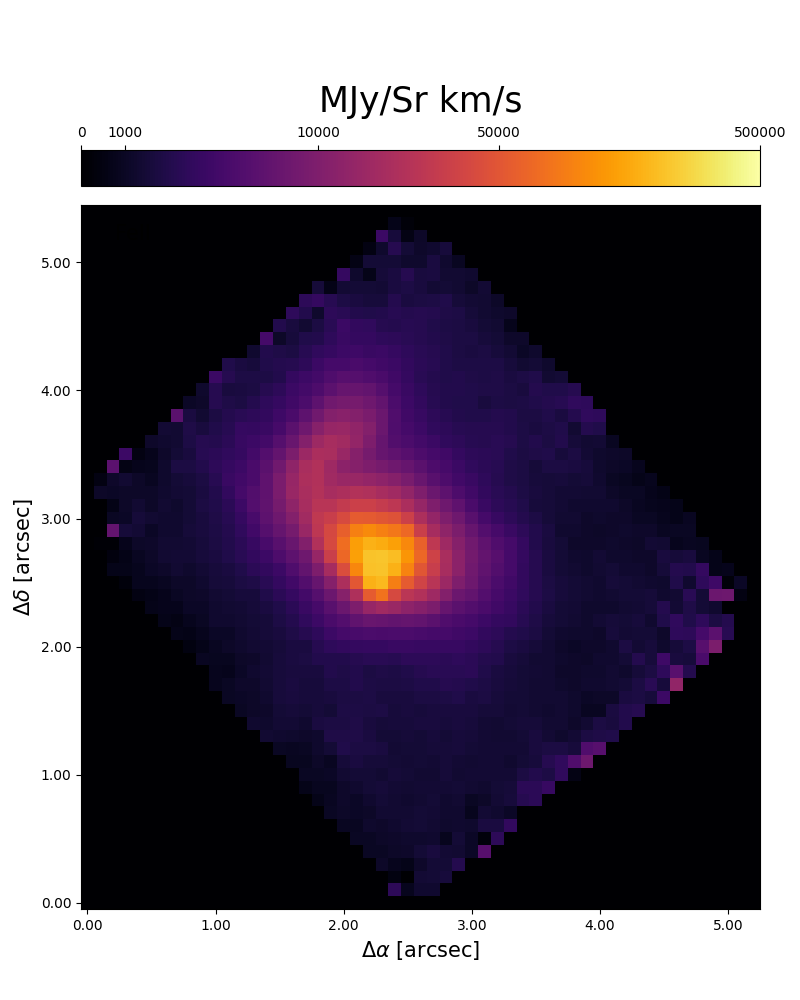

In [149]:
# Plot the raw image, g140 
g140_s3d_cont_M0 = subcont_dict['TMC1A_g140h.s3d_cont_M0']['data']
pixel = subcont_dict['TMC1A_g140h.s3d_cont_M0']['header']['CDELT1']*3600 # change the pixel unit  qfrom deg to arcsec

def axis_transfer(pos,val):
    return f'{pos*pixel:.2f}'

fig = plt.figure(figsize = (8,10))

widths = [0.05,1]
heights = [0.05,1]
gs = fig.add_gridspec(2, 2, width_ratios=widths,height_ratios=heights)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.85, wspace=0.02, hspace=0.02)

ax1 = fig.add_subplot(gs[1,1])
cbar1 = fig.add_subplot(gs[0,1])
norm1 = ImageNormalize(g140_s3d_cont_M0, vmin= -1, vmax = 5e5, stretch=AsinhStretch(a=5e-3))
plt1 = ax1.imshow(g140_s3d_cont_M0, norm = norm1, cmap= 'inferno', origin = 'lower')
cb1 = Colorbar(ax = cbar1, mappable = plt1, orientation = 'horizontal', ticklocation = 'top', ticks = [0, 1e3, 1e4, 5e4, 5e5])

ax1.xaxis.set_major_formatter(FuncFormatter(axis_transfer))
ax1.yaxis.set_major_formatter(FuncFormatter(axis_transfer))
ax1.set_xlabel(r'$\Delta \alpha$' +' [arcsec]', fontsize = 15)
ax1.set_ylabel(r'$\Delta \delta$'+' [arcsec]',fontsize = 15)
ax1.text(0.05,0.95, 'FeII',transform=ax1.transAxes,fontsize = 15)
cbar1.set_title('MJy/Sr km/s',fontsize = 25, pad= 10)